#                          Analysis of Autos data scrapped

##                                         --------------------Part 1--------------------
Read the autos.csv CSV file into pandas, and assign it to the variable name autos.
If you get an encoding error,try the next two most popular encodings (Latin-1 and Windows-1252) until you are able to read the file without error.Create a new cell with just the variable autos and run this cell. 

##                                          --------------------Solution of Part 1--------------------

In [53]:
#Importing pandas package
import pandas as pd

#Defining path of the data file to be read from
autos_path='C:/Users/mrityunjay1.pandey/GreyAtom/Day2/autos.csv'
#Reading file without specifying any encoding
#autos=pd.read_csv(autos_path)
#running above line gives below error 
#"UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdc in position 23: invalid continuation byte

#Reading data with encodng specified, both encoding Windows-1252 & Latin-1 works fine.
#autos_win=pd.read_csv(autos_path,encoding='Windows-1252')
autos=pd.read_csv(autos_path,encoding='latin-1')

A neat feature of jupyter notebook is its ability to render the first few and 
last few values of any pandas object.Use the DataFrame.info() and DataFrame.head() 
methods to print information about the autos dataframe, as well as the first few rows.

In [54]:
#Getting information about the dataframe
autos.info()
#getting first 5 rows of the dataframe
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


##                                          --------------------Part 2--------------------
Use the DataFrame.columns attribute to print an array of the existing column names.
Copy that array and make the following edits to columns names: 
    yearOfRegistration to registration_year 
    monthOfRegistration to registration_month 
    notRepairedDamage to unrepaired_damage 
    dateCreated to ad_created 
The rest of the columnn names from camelcase to snakecase.
Assign the modified column names back to the DataFrame.columns attribute. 
Use DataFrame.head() to look at the current state of the autos dataframe.

##                                         -----------Solution Of Part 2----------------


In [55]:
#Getting column names of the dataframe
list_columns=list(autos.columns)

In [56]:
#Renaming columns as asked in the excersise
autos.rename(columns={
        "yearOfRegistration":"registration_year",
        "monthOfRegistration":"registration_month",
        "notRepairedDamage":"unrepaired_damage",
        "dateCreated":"ad_created"},inplace=True)

In [57]:
#Function to convert column names in Snake Case
def to_snake_case(str):
    return ''.join(['_'+i.lower() if i.isupper()  
               else i for i in str]).lstrip('_') 
         
#Applying for loop and passing string in the function
j=0
for i in list_columns:
    list_columns[j]=to_snake_case(list_columns[j])
    j=j+1
#assigning modified name to column names
autos.columns=list_columns

##                                          --------------------Part 3--------------------

Use DataFrame.describe() to look at descriptive statistics for all columns.
Write a markdown cell noting: Any columns that have mostly one value that are candidates to be dropped Any columns that need more investigation.Any examples of numeric data stored as text that needs to be cleaned.
If you need to investigate any columns more, do so and write up any additional things you found.You likely found that the price and odometer columns are numeric values stored as text.For each column: Remove any non-numeric characters. Convert the column to a numeric dtype.Use DataFrame.rename() to rename the column to odometer_km.

##                                          --------------------Solution to Part 3--------------------

In [58]:
#To describe dataframe
autos.describe()

,year_of_registration,power_p_s,month_of_registration,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


##### DataType correction
date_crawled             50000 non-null object ---------->Should be DateTime Object
price                    50000 non-null object ---------->Should be integer
odometer                 50000 non-null object ---------->Should be integer
date_created             50000 non-null object ---------->Should be Date Time 
last_seen                50000 non-null object ---------->Should be Date

In [59]:
#Replacing special symbols "$ & ," from Price
autos.price=autos.price.str.replace(",","").str.replace("$","").astype(int)

In [60]:
#Renaming odometer column to odomete_KM for better understanding and removing "," & "KM" from odometer data.
#Converting type of odometer_km from object to float
autos.rename(columns={"odometer":"odometer_km"},inplace=True)
autos.odometer_km=autos.odometer_km.str.replace(",","").str.replace("km","").astype(float)

In [61]:
#Conveting date_crawled to datetime
autos.date_crawled=pd.to_datetime(autos.date_crawled)

In [62]:
#Conveting date_created to datetime
autos.date_created=pd.to_datetime(autos.date_created)

In [63]:
#Conveting last_seen to datetime
autos.last_seen=pd.to_datetime(autos.last_seen)

#### Identifying columns to drop.
Since **nr_of_pictures** has values 0 for all records hence no influnnce in the model, thus candidate for **dropping**.


In [64]:
autos.drop(["nr_of_pictures"],1,inplace=True)

**seller** column has 2 values with 49999 records having same and 1 of different hence no influnce on the model.Thus **candidate for dropping.**


In [65]:
autos.drop(["seller"],1,inplace=True)

**Offer_type** has similar type of value for all records except 1 thus **candidate of dropping.**


In [66]:
autos.drop(["offer_type"],1,inplace=True)

**postal_code** is a demographic data having not much influence thus **candidate of dropping.**

In [67]:
autos.drop(["postal_code"],1,inplace=True)

##                                          --------------------Part 4--------------------
**For each of the odometer_km and price columns:**
      Use the techniques above to explore the data If you find there are outliers, remove them and write a markdown paragraph explaining your decision. 
    After you have removed the outliers, make some observations about the remaining values.

##                                    --------------------Solution of Part 4--------------------

####            =============Analysis of odometer_km data=================

In [68]:
autos[autos["odometer_km"]<125000].odometer_km.value_counts()

100000.0    2169
90000.0     1757
80000.0     1436
70000.0     1230
60000.0     1164
50000.0     1027
5000.0       967
40000.0      819
30000.0      789
20000.0      784
10000.0      264
Name: odometer_km, dtype: int64

In [69]:
autos[autos["odometer_km"]<125000].odometer_km.value_counts().sum()

12406

In [70]:
autos[autos["odometer_km"]>125000].odometer_km.value_counts().sum()

32424

In [71]:
autos[autos["odometer_km"]==125000].odometer_km.value_counts().sum()

5170

Above analysis of data suggest there are huge values however not necessary these are outliers.Since these are KM driven and the car is used car,it is highly likely that owner of the car has driven these many KM.Will further investigate on Price data for finding if there are any outlier.

####            =============Analysis of price data=================

In [72]:
autos.price.value_counts()

0        1421
500       781
1500      734
2500      643
1000      639
         ... 
20790       1
8970        1
846         1
2895        1
33980       1
Name: price, Length: 2357, dtype: int64

Above analysis says there are data in **price** columns with **values 0** and few with **single entries.**

In [73]:
#For Finding total number pf records with price as 0
autos[autos.price==0].price.value_counts().sum()

1421

There are **1421** records having **price as 0**.Since this is an advertisement for **selling cars**, there should not be any advertisement of used car having price as 0. Thus **droping these records.**


In [74]:
autos.drop(autos[autos.price==0].index,0,inplace=True)

In [75]:
#Sorting dataframe on price column in descending
autos.sort_values("price",ascending=False,inplace=True)

Post sorting price in decending, it is evident there are values not practically possible for price of used cars.droping top 7 rows of price having outliers.

In [76]:
autos.drop(autos.price.head(7).index,0,inplace=True)

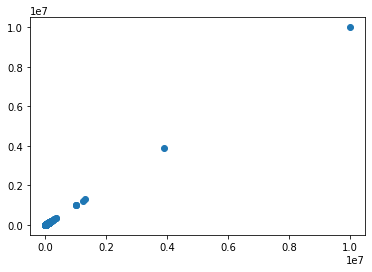

In [77]:
#Plotting scatterplot still shows 2 outliers in price.droping those 2 as well.
import matplotlib.pyplot as plt
plt.scatter(autos.price,autos.price)

With help of above scatter plot it seems there are still few outliers,dropping top 2.

In [78]:
autos.drop(autos.price.head(2).index,0,inplace=True)

Further analysis shows price range is still skewed thus **dropping columns having price as 1**

In [79]:
autos.drop(autos[autos.price==1].price.index,0,inplace=True)

Plotting scatter plot to check if there are still outliers.


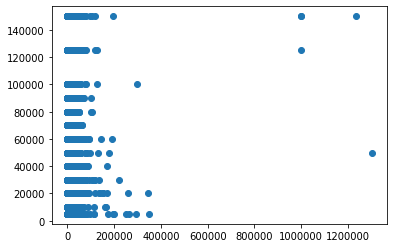

In [80]:
plt.scatter(autos.price,autos.odometer_km)

Further analysis reveals there are still outliers for odometer_km & price.Since these are used cars with more odometer_KM the price of car should not increase.**Removing 5 outliers from price more than 600000**

In [81]:
autos.drop(autos[autos.price>600000].index,0,inplace=True)

#### Binning data for analysis
Defining bin using **qcut**

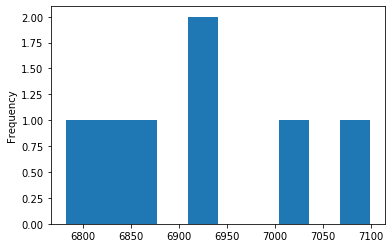

In [82]:
pd.qcut(autos['price'], q=7).value_counts().plot(kind="hist")

##                                          --------------------Part 5--------------------
Use the workflow we just described to calculate the distribution of values in the date_crawled,ad_created, and last_seen columns (all string columns) as percentages.To include missing values in the distribution and to use percentages instead of counts,chain the Series.value_counts(normalize=True, dropna=False) method.To rank by date in ascending order (earliest to latest), chain the Series.sort_index() method.Write a markdown cell after each column exploration to explain your observations.
Use Series.describe() to understand the distribution of registration_year.

##                                    --------------------Solution of Part 5--------------------

In [83]:
#Converting data in date_crawled from yyyy-mm-dd hh:mm:ss to yyyy-mm-dd
autos.date_crawled=pd.to_datetime(autos.date_crawled,format='%d/%m/%y').dt.strftime('%d-%m-%Y')

In [84]:
#Converting data in date_created from yyyy-mm-dd hh:mm:ss to yyyy-mm-dd
autos.date_created=pd.to_datetime(autos.date_created,format='%d/%m/%y').dt.strftime('%d-%m-%Y')

In [85]:
#Converting data in last_seen from yyyy-mm-dd hh:mm:ss to yyyy-mm-dd
autos.last_seen=pd.to_datetime(autos.last_seen,format='%d/%m/%y').dt.strftime('%d-%m-%Y')

In [86]:
#Checking ads created(date_created) in the month of the year
pd.to_datetime(autos.date_created,format='%d-%m-%Y').dt.strftime('%m-%Y').value_counts()

03-2016    40543
04-2016     7787
02-2016       61
01-2016       12
12-2015        2
08-2015        1
06-2015        1
11-2015        1
09-2015        1
Name: date_created, dtype: int64

In [87]:
#Checking date_crawled in the month of the year
pd.to_datetime(autos.date_crawled,format='%d-%m-%Y').dt.strftime('%m-%Y').value_counts()

03-2016    40571
04-2016     7838
Name: date_crawled, dtype: int64

In [88]:
#Checking last_seen in the month of the year
pd.to_datetime(autos.last_seen,format='%d-%m-%Y').dt.strftime('%m-%Y').value_counts()

04-2016    27882
03-2016    20527
Name: last_seen, dtype: int64

In [89]:
#Checking percenatge of date_crawled
autos.date_crawled.value_counts(normalize=True,dropna=False)

03-04-2016    0.038588
20-03-2016    0.037803
21-03-2016    0.037307
12-03-2016    0.036956
14-03-2016    0.036625
04-04-2016    0.036481
07-03-2016    0.036047
02-04-2016    0.035489
28-03-2016    0.034849
19-03-2016    0.034746
15-03-2016    0.034270
29-03-2016    0.034126
30-03-2016    0.033733
01-04-2016    0.033733
08-03-2016    0.033279
09-03-2016    0.033052
22-03-2016    0.032928
11-03-2016    0.032597
23-03-2016    0.032267
26-03-2016    0.032246
10-03-2016    0.032205
31-03-2016    0.031812
17-03-2016    0.031626
25-03-2016    0.031564
27-03-2016    0.031131
16-03-2016    0.029519
24-03-2016    0.029395
05-03-2016    0.025367
13-03-2016    0.015658
06-03-2016    0.014068
05-04-2016    0.013076
18-03-2016    0.012911
06-04-2016    0.003161
07-04-2016    0.001384
Name: date_crawled, dtype: float64

In [90]:
#Working with DateTime
import datetime as dt
autos['age_of_vehicle_months']=(dt.datetime.now().year-autos.year_of_registration)*12 + autos.month_of_registration

After calculating age of vehicle it looks like their are vehicles having **negative age**, which can't be the case.
Hence dropping such records.

In [91]:
autos.drop(autos[autos.age_of_vehicle_months<0].age_of_vehicle_months.index,0,inplace=True)

In [92]:
#Month of registration values has 0 which can't be the case, replacing all 0 with 1 for start of the year.
autos.month_of_registration=autos.month_of_registration.replace(0,1)

**Note To Check with**
#???????????Confused?????????How to conver month.

#autos['age_in_month']=pd.to_datetime((autos.month_of_registration.astype(str)+"-"+autos.year_of_registration.astype(str)),format='%m-%Y').dt.strftime('%m-%Y')


##                                          --------------------Part 6--------------------
Decide which the highest and lowest acceptable values are for the registration_year column.Write a markdown cell explaining your decision and why.Remove the values outside those upper and lower bounds and calculate the distribution of the remaining values using Series.value_counts(normalize=True).Write a markdown cell explaining your observations

##                                          -------------Solution of Part 6----------------

Analysis shows there are **9** records having **age of vehicle** more than **100 Yrs**.Which doesn't seem to be correct.Removing these records.


In [93]:
autos[autos.age_of_vehicle_months/12>100]

,date_crawled,name,price,abtest,vehicle_type,year_of_registration,gearbox,power_p_s,model,odometer_km,month_of_registration,fuel_type,brand,not_repaired_damage,date_created,last_seen,age_of_vehicle_months
49283,15-03-2016,Citroen_HY,7750,control,NaN,1001,NaN,0,andere,5000.0,1,NaN,citroen,NaN,15-03-2016,06-04-2016,12228
22316,29-03-2016,VW_Kaefer.__Zwei_zum_Preis_von_einem.,1500,control,NaN,1000,manuell,0,kaefer,5000.0,1,benzin,volkswagen,NaN,29-03-2016,31-03-2016,12240
28693,22-03-2016,Renault_Twingo,599,control,kleinwagen,1910,manuell,0,NaN,5000.0,1,benzin,renault,NaN,22-03-2016,06-04-2016,1320
22659,14-03-2016,Opel_Corsa_B,500,test,NaN,1910,NaN,0,corsa,150000.0,1,NaN,opel,NaN,14-03-2016,03-04-2016,1320
24511,17-03-2016,Trabant__wartburg__Ostalgie,490,control,NaN,1111,NaN,0,NaN,5000.0,1,NaN,trabant,NaN,17-03-2016,07-04-2016,10908
10556,01-04-2016,UNFAL_Auto,450,control,NaN,1800,NaN,1800,NaN,5000.0,2,NaN,mitsubishi,nein,01-04-2016,01-04-2016,2642
32585,02-04-2016,UNFAL_Auto,450,control,NaN,1800,NaN,1800,NaN,5000.0,2,NaN,mitsubishi,nein,02-04-2016,04-04-2016,2642
30781,25-03-2016,Opel_Calibra_V6_DTM_Bausatz_1:24,30,test,NaN,1910,NaN,0,calibra,100000.0,1,NaN,opel,NaN,25-03-2016,26-03-2016,1320
45157,11-03-2016,Motorhaube,15,control,NaN,1910,NaN,0,NaN,5000.0,1,NaN,trabant,NaN,11-03-2016,25-03-2016,1320


In [94]:
autos.drop(autos[autos.age_of_vehicle_months/12>100].age_of_vehicle_months.index,0,inplace=True)

Binning the age of vehicles it suggest 60% of vehicles are of age 14 to 27 Years.35% of 1 to 14 years

In [95]:
pd.cut(autos['age_of_vehicle_months'],bins=7).value_counts(normalize=True)

(173.857, 331.714]    0.594523
(14.895, 173.857]     0.354779
(331.714, 489.571]    0.040570
(489.571, 647.429]    0.007399
(647.429, 805.286]    0.002315
(963.143, 1121.0]     0.000227
(805.286, 963.143]    0.000186
Name: age_of_vehicle_months, dtype: float64

Increasing the **bin size to 15** shows to 5 distribution of age of cars.
   - 34% of age 13-19
   - 27% of age 19-25,
   - 21% of age 7 to 13
   - 9% of age 1 to 7
   - 5% of age 25-32

To Summaries _97%_ of the cars are in age group <font color=blue>1-32</font>

In [96]:
pd.cut(autos['age_of_vehicle_months'],bins=15).value_counts(normalize=True)

(163.333, 237.0]       0.341366
(237.0, 310.667]       0.274341
(89.667, 163.333]      0.218539
(14.895, 89.667]       0.093128
(310.667, 384.333]     0.050036
(384.333, 458.0]       0.009714
(458.0, 531.667]       0.005043
(531.667, 605.333]     0.003472
(605.333, 679.0]       0.002604
(679.0, 752.667]       0.001116
(752.667, 826.333]     0.000248
(973.667, 1047.333]    0.000165
(826.333, 900.0]       0.000103
(1047.333, 1121.0]     0.000062
(900.0, 973.667]       0.000062
Name: age_of_vehicle_months, dtype: float64

##                                          --------------------Part 7--------------------
Explore the unique values in the brand column, and decide on which brands you want to aggregate by.
You might want to select the top 20, or you might want to select those that have over a certain percentage of the total values (e.g. > 5%).
Remember that Series.value_counts() produces a series with index labels, so you can use Series.index attribute to access the labels, should you wish. 
Write a short paragraph describing the brand data, and explaining which brands you've chosen to aggregate on.
Create an empty dictionary to hold your aggregate data.
Loop over your selected brands, and assign the mean price to the dictionary, with the brand name as the key. 
Print your dictionary of aggregate data, and write a paragraph analyzing the results.

##                                          -------------Solution of Part 7----------------

Unique values in brand

In [97]:
pd.unique(autos.brand)

array(['porsche', 'sonstige_autos', 'bmw', 'mercedes_benz', 'audi',
       'ford', 'land_rover', 'renault', 'volkswagen', 'jaguar',
       'chevrolet', 'jeep', 'alfa_romeo', 'toyota', 'honda', 'opel',
       'mazda', 'mitsubishi', 'nissan', 'mini', 'seat', 'citroen',
       'skoda', 'subaru', 'hyundai', 'lancia', 'volvo', 'kia', 'peugeot',
       'fiat', 'rover', 'suzuki', 'chrysler', 'saab', 'smart', 'dacia',
       'daihatsu', 'lada', 'trabant', 'daewoo'], dtype=object)

In [98]:
autos.brand.value_counts()

volkswagen        10303
bmw                5253
opel               5245
mercedes_benz      4634
audi               4155
ford               3375
renault            2316
peugeot            1426
fiat               1260
seat                916
skoda               778
nissan              740
mazda               739
smart               694
citroen             683
toyota              611
hyundai             482
sonstige_autos      459
volvo               437
mini                418
mitsubishi          394
honda               387
kia                 345
alfa_romeo          320
suzuki              285
porsche             285
chevrolet           274
chrysler            169
dacia               129
daihatsu            122
jeep                107
subaru              101
land_rover           99
saab                 79
daewoo               76
jaguar               74
trabant              66
rover                65
lancia               55
lada                 29
Name: brand, dtype: int64

Taking percentage share of brands in the data

In [99]:
autos.brand.value_counts(normalize=True)*100

volkswagen        21.293789
bmw               10.856670
opel              10.840136
mercedes_benz      9.577348
audi               8.587372
ford               6.975302
renault            4.786607
peugeot            2.947194
fiat               2.604113
seat               1.893149
skoda              1.607936
nissan             1.529400
mazda              1.527333
smart              1.434329
citroen            1.411595
toyota             1.262788
hyundai            0.996177
sonstige_autos     0.948641
volvo              0.903172
mini               0.863904
mitsubishi         0.814302
honda              0.799835
kia                0.713031
alfa_romeo         0.661362
suzuki             0.589026
porsche            0.589026
chevrolet          0.566291
chrysler           0.349282
dacia              0.266612
daihatsu           0.252144
jeep               0.221143
subaru             0.208742
land_rover         0.204609
saab               0.163274
daewoo             0.157073
jaguar             0

In [100]:
#creating Brand List for getting aggregate data
brand_list=['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart',
       'citroen']

In [101]:
#Empty dictnory initialisation for storing mean price
mean_price_per_brand={}

In [102]:
for i in brand_list:
    #price_mean=autos[autos["brand"]==i].price.mean()
    #temp={i:price_mean}
    mean_price_per_brand.update({i:autos[autos["brand"]==i].price.mean()})

In [103]:
print("::::::::Price of brands::::::::\n",mean_price_per_brand)

::::::::Price of brands::::::::
 {'volkswagen': 5347.68727555081, 'bmw': 8294.405101846563, 'opel': 2957.623832221163, 'mercedes_benz': 8556.059991368149, 'audi': 9241.752587244284, 'ford': 3736.143111111111, 'renault': 2440.3812607944733, 'peugeot': 3074.2082748948105, 'fiat': 2798.3031746031747, 'seat': 4334.31441048035, 'skoda': 6369.875321336761, 'nissan': 4675.6945945945945, 'mazda': 4059.059539918809, 'smart': 3518.102305475504, 'citroen': 3767.0688140556367}


##                                          --------------------Part 8--------------------

Use the loop method from the last screen to calculate the mean mileage and mean price for each of the top brands, storing the results in a dictionary.Convert both dictionaries to series objects, using the series constructor.Create a dataframe from the first series object using the dataframe constructor.Assign the other series as a new column in this dataframe.Pretty print the dataframe, and write a paragraph analyzing the aggregate data.

##                                          -------------Solution of Part 8----------------